In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [28]:
ab = '../../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../../refs/cerberus/v40_transcript_metadata.tsv'
t_orig_metadata = '../../../refs/v40_transcript_metadata.tsv'
swan_file = '../../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../../lr_bulk/cerberus/swan/major_isos.tsv'
mane_file = '../../../refs/v40_gene_metadata.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
predom_subset = 'protein_coding'
obs_col = 'sample'


In [4]:
ca = cerberus.read(cerberus_h5)

In [5]:
df = ca.triplets.loc[ca.triplets.source.isin(['obs_det', 'obs_major'])]

In [7]:
df.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
0,obs_det,ENSG00000000003,1.0,6.0,9.0,28.0,2.571429,0.104478,0.626866,0.268657,tes,TSPAN6,NaN,NaN
1,obs_det,ENSG00000000005,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,TNMD,NaN,NaN
2,obs_det,ENSG00000000419,2.0,4.0,9.0,15.0,3.000000,0.222222,0.444444,0.333333,mixed,DPM1,NaN,NaN
3,obs_det,ENSG00000000457,3.0,4.0,5.0,7.0,1.428571,0.355932,0.474576,0.169492,mixed,SCYL3,NaN,NaN
4,obs_det,ENSG00000000460,3.0,4.0,7.0,15.0,2.000000,0.333333,0.444444,0.222222,mixed,C1orf112,NaN,NaN


In [9]:
obs = df.loc[df.source == 'obs_det'][['gid', 'gname', 'n_iso']]

In [10]:
major = df.loc[df.source == 'obs_major'][['gid', 'gname', 'n_iso']]

In [14]:
temp = obs.merge(major, how='outer', on=['gid', 'gname'], suffixes=('_obs', '_major'))

In [15]:
temp.head()

,gid,gname,n_iso_obs,n_iso_major
0,ENSG00000000003,TSPAN6,28.0,12.0
1,ENSG00000000005,TNMD,1.0,1.0
2,ENSG00000000419,DPM1,15.0,10.0
3,ENSG00000000457,SCYL3,7.0,5.0
4,ENSG00000000460,C1orf112,15.0,10.0


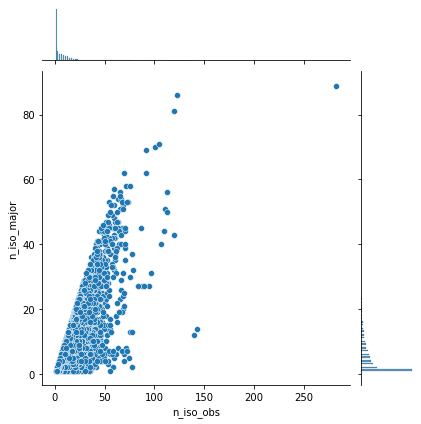

In [19]:
sns.jointplot(temp, x='n_iso_obs', y='n_iso_major')

In [20]:
temp['diff'] = temp.n_iso_obs-temp.n_iso_major


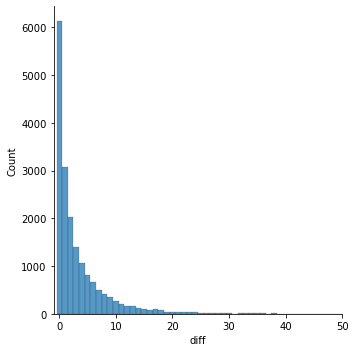

In [26]:
temp2 = temp.loc[temp.n_iso_obs!=1]
ax = sns.displot(temp2, x='diff', discrete=True)
ax.set(xlim=(-1, 50))

In [27]:
ca.triplets.loc[(ca.triplets.gname=='AKAP8L')&(ca.triplets.source=='obs_det')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
281,obs_det,ENSG00000011243,3.0,6.0,23.0,23.0,5.111111,0.212598,0.425197,0.362205,mixed,AKAP8L,NaN,NaN


In [31]:
ca.triplets.loc[(ca.triplets.gname=='PDE4C')&\
                (ca.triplets.source=='sample')&\
                (ca.triplets['sample']=='pgp1')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm


In [33]:
ca.triplets.loc[(ca.triplets.gname=='PDE4C')&\
                (ca.triplets.source=='sample')&\
                (ca.triplets['sample']=='pgp1_excite_neuron')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm


In [32]:
# plot_browser_isos_2(cerberus_h5,
#                     swan_file, 
#                     filt_ab,
#                     major_isos,
#                     'PDE4C',
#                     obs_col,
#                     'pgp1',
#                     'figures/pde4c_pgp1_browser_isos.pdf',
#                     h=0.2,
#                     ref_sources=['v29', 'v40'])

In [ ]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'PDE4C',
                    obs_col,
                    'pgp1_excite_neuron',
                    'figures/pde4c_pgp1_excite_neuron_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])